# Build A Machine Learning Model To Predict Input Feature As An Output

- Here we go for predicting three input features like an output they are **Exposure Time, Light of delay, and Layer height.**
- **variation, Orientation, and Surface Roughness** are input variables.


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_excel('1- DoE and Data.xlsx')

# Data Cleaning And Filteration

In [3]:
df.head()

,StdOrder,RunOrder,Layer Height,Exposure Time,Light Off Delay,Orientation,Time,Diameter,Length,Height 1,Square Pin Width,Square Pin Length,Height 2,Surface Roughness
0,35,1,0.050,2.25,12,Z,137,4.077,12.035,3.080,2.005,2.125,7.040,2.2
1,10,2,0.075,2.50,12,X,93,4.202,11.935,3.005,2.015,1.975,7.055,1.9
2,2,3,0.100,2.00,13,X,74,4.128,12.020,3.110,2.115,2.070,7.090,2.5
3,31,4,0.050,2.00,13,Z,143,4.148,11.970,3.100,1.975,2.070,7.010,2.0
4,36,5,0.100,2.25,12,Z,70,3.885,12.150,3.215,1.860,2.045,7.010,5.2


In [4]:
np.sum(df.isna())

StdOrder             0
RunOrder             0
Layer Height         0
Exposure Time        0
Light Off Delay      0
Orientation          0
Time                 0
Diameter             0
Length               0
Height 1             0
Square Pin Width     0
Square Pin Length    0
Height 2             0
Surface Roughness    0
dtype: int64

In [5]:
df.columns

Index(['StdOrder', 'RunOrder', 'Layer Height', 'Exposure Time',
       'Light Off Delay', 'Orientation', 'Time', 'Diameter', 'Length',
       'Height 1', 'Square Pin Width', 'Square Pin Length', 'Height 2',
       'Surface Roughness'],
      dtype='object')

In [6]:
df_1= df[['Layer Height', 'Exposure Time','Light Off Delay', 'Orientation', 'Height 2','Surface Roughness']]

In [7]:
df_1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Height 2,Surface Roughness
0,0.050,2.25,12,Z,7.040,2.2
1,0.075,2.50,12,X,7.055,1.9
2,0.100,2.00,13,X,7.090,2.5
3,0.050,2.00,13,Z,7.010,2.0
4,0.100,2.25,12,Z,7.010,5.2


In [8]:
df_1[['Height 2']]=df_1[['Height 2']]-7

S:\softwares\Anaconda\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
df_1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Height 2,Surface Roughness
0,0.050,2.25,12,Z,0.040,2.2
1,0.075,2.50,12,X,0.055,1.9
2,0.100,2.00,13,X,0.090,2.5
3,0.050,2.00,13,Z,0.010,2.0
4,0.100,2.25,12,Z,0.010,5.2


In [10]:
from sklearn.preprocessing import LabelEncoder
df_1.Orientation= LabelEncoder().fit_transform(df['Orientation'])

S:\softwares\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Height 2,Surface Roughness
0,0.050,2.25,12,2,0.040,2.2
1,0.075,2.50,12,0,0.055,1.9
2,0.100,2.00,13,0,0.090,2.5
3,0.050,2.00,13,2,0.010,2.0
4,0.100,2.25,12,2,0.010,5.2


In [12]:
df_1.rename(columns={'Layer Height':'lr_h','Exposure Time':'exp_t','Light Off Delay':'lod','Height 2':'variation','Surface Roughness':'surf_R'},inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
array= scaler.fit_transform(df_1[['exp_t', 'lod']])
df_nor= pd.DataFrame(data=array,columns=['exp_t', 'lod'])

S:\softwares\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
df_nor_1= df_1.drop(['exp_t', 'lod'],axis=1)
df_norm= pd.concat([df_nor_1,df_nor],axis='columns')

In [14]:
df_norm.head()

,lr_h,Orientation,variation,surf_R,exp_t,lod
0,0.050,2,0.040,2.2,0.5,0.0
1,0.075,0,0.055,1.9,1.0,0.0
2,0.100,0,0.090,2.5,0.0,0.5
3,0.050,2,0.010,2.0,0.0,0.5
4,0.100,2,0.010,5.2,0.5,0.0


# Correlation or 5th Dimensional plot

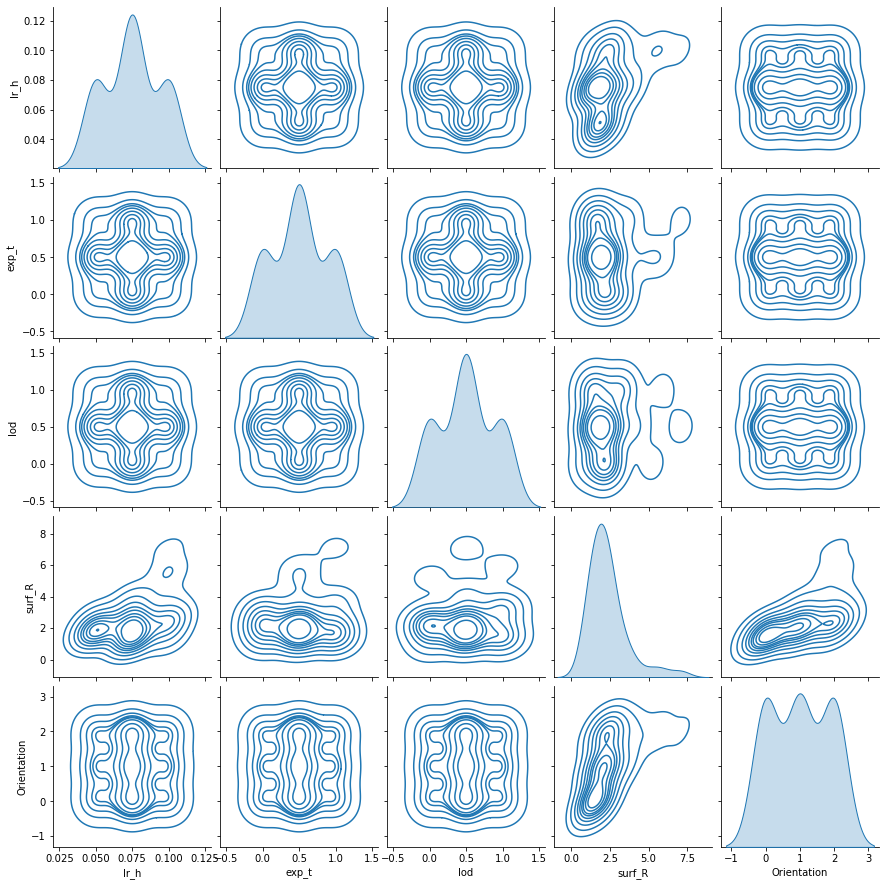

In [15]:
sns.pairplot(df_norm[['lr_h', 'exp_t', 'lod', 'surf_R','Orientation']],kind='kde')

In [16]:
df_norm.columns

Index(['lr_h', 'Orientation', 'variation', 'surf_R', 'exp_t', 'lod'], dtype='object')

In [17]:
x= df_norm[['variation', 'Orientation','surf_R']]
y= df_norm.drop(['variation', 'Orientation','surf_R'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train

,variation,Orientation,surf_R
31,-0.005,2,4.2
29,0.060,0,2.4
20,0.265,1,2.3
41,0.080,0,0.9
2,0.090,0,2.5
43,-0.100,1,2.3
18,0.095,0,1.2
15,0.240,1,2.3
22,0.005,2,2.5
16,-0.020,2,5.9


# Linear Regression

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

lr_model= LinearRegression()
lr_model.fit(x_train,y_train)


def predicted_value(model,variation,orientation,surf_R):
    y_pred= model.predict([[variation,orientation,surf_R]])
    actual_value= [y_pred[0][0],0,0]
    array = ['lr_h', 'exp_t', 'lod']
    for i in range(len(model.predict([[variation,orientation,surf_R]])[0])):
        if i>0:
            a= np.max(df_1[array[i]])
            b= np.min(df_1[array[i]])
            c= y_pred[0][i]
            actual = (a-b)*c+b
            actual_value[i]=actual
    return actual_value

y_pred_x=predicted_value(lr_model,0,0,0)
y_pred_y=predicted_value(lr_model,0,1,0)
y_pred_z=predicted_value(lr_model,0,2,0)

RMSE= mean_squared_error(y_test,lr_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,lr_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x= {}
test_result_x['Linear_model']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]
test_result_y= {}
test_result_y['Linear_model']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]
test_result_z= {}
test_result_z['Linear_model']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]


RMSE: 0.231 and MAE: 0.180
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.06099017229934581, 2.2474227895959253, 12.888201977088151] 
 On y axis:  [0.053131584077238635, 2.2302214134211606, 12.801328196514332] 
 On z axis:  [0.04527299585513146, 2.213020037246396, 12.714454415940512]


# Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dec_reg_model= DecisionTreeRegressor()
dec_reg_model.fit(x_train,y_train)


y_pred_x=predicted_value(dec_reg_model,0,0,0)
y_pred_y=predicted_value(dec_reg_model,0,1,0)
y_pred_z=predicted_value(dec_reg_model,0,2,0)

RMSE= mean_squared_error(y_test,dec_reg_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,dec_reg_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x['Decision Tree']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]

test_result_y['Decision Tree']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]

test_result_z['Decision Tree']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]


RMSE: 0.366 and MAE: 0.304
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.07500000000000001, 2.25, 13.0] 
 On y axis:  [0.07500000000000001, 2.5, 14.0] 
 On z axis:  [0.07500000000000001, 2.5, 14.0]


# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
lasso_model= Lasso()
lasso_model.fit(x_train,y_train)

y_pred_x=predicted_value(lasso_model,0,0,0)
y_pred_y=predicted_value(lasso_model,0,1,0)
y_pred_z=predicted_value(lasso_model,0,2,0)

RMSE= mean_squared_error(y_test,lasso_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,lasso_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x['Lasso Regression']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]

test_result_y['Lasso Regression']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]

test_result_z['Lasso Regression']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]

RMSE: 0.226 and MAE: 0.162
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.07083333333333332, 2.25, 13.055555555555555] 
 On y axis:  [0.07083333333333332, 2.25, 13.055555555555555] 
 On z axis:  [0.07083333333333332, 2.25, 13.055555555555555]


# KNN Model

In [33]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model= KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(x_train,y_train)

y_pred_x=predicted_value(KNN_model,0,0,0)
y_pred_y=predicted_value(KNN_model,0,1,0)
y_pred_z=predicted_value(KNN_model,0,2,0)

RMSE= mean_squared_error(y_test,KNN_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,KNN_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x['KNN Model']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]

test_result_y['KNN Model']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]

test_result_z['KNN Model']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]


RMSE: 0.242 and MAE: 0.194
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.07500000000000001, 2.2, 13.2] 
 On y axis:  [0.07500000000000001, 2.3, 13.2] 
 On z axis:  [0.065, 2.3, 13.2]


# The result concerning the x-axis with zero Surface Roughness and Variation

In [34]:
pd.DataFrame(test_result_x,index=['RMSE','MAE','Layer Height','Exposure Delay','Light Of Display']).T

,RMSE,MAE,Layer Height,Exposure Delay,Light Of Display
Linear_model,0.231429,0.180131,0.060990,2.247423,12.888202
Decision Tree,0.366162,0.303704,0.075000,2.250000,13.000000
Lasso Regression,0.226350,0.161780,0.070833,2.250000,13.055556
KNN Model,0.241582,0.193704,0.075000,2.200000,13.200000


# The result concerning the y-axis with zero Surface Roughness and Variation

In [35]:
pd.DataFrame(test_result_y,index=['RMSE','MAE','Layer Height','Exposure Delay','Light Of Display']).T

,RMSE,MAE,Layer Height,Exposure Delay,Light Of Display
Linear_model,0.231429,0.180131,0.053132,2.230221,12.801328
Decision Tree,0.366162,0.303704,0.075000,2.500000,14.000000
Lasso Regression,0.226350,0.161780,0.070833,2.250000,13.055556
KNN Model,0.241582,0.193704,0.075000,2.300000,13.200000


# The result concerning the z-axis with zero Surface Roughness and Variation

In [36]:
pd.DataFrame(test_result_z,index=['RMSE','MAE','Layer Height','Exposure Delay','Light Of Display']).T

,RMSE,MAE,Layer Height,Exposure Delay,Light Of Display
Linear_model,0.231429,0.180131,0.045273,2.21302,12.714454
Decision Tree,0.366162,0.303704,0.075000,2.50000,14.000000
Lasso Regression,0.226350,0.161780,0.070833,2.25000,13.055556
KNN Model,0.241582,0.193704,0.065000,2.30000,13.200000
